# Sentiment-Analysis

The Air France Reviews Dataset is a collection of customer reviews specifically curated to analyze feedback on Air France services. This dataset was ethically mined using apify.com, ensuring compliance with web scraping guidelines and ethical standards. Additionally, all personally identifiable information (PII) has been thoroughly removed to protect user privacy, making it safe for further analysis and application in data-driven projects.

**Dataset Columns**

The dataset includes several key columns:

Review Text: The main text of the review, capturing the customer’s opinion.

Rating: The numerical rating given by the customer, typically ranging from 1 to 5.

Review Date: The date on which the review was posted.

Sentiment: An automatic or manually annotated field that indicates the review's sentiment (e.g., positive, 
negative, neutral).

Review Source: The platform or website from which the review was gathered (if applicable).

Language: The language of the review, helpful for multilingual analysis.

## Importing the necessary libraries

In [67]:
import pandas as pd
import numpy as np
import re
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from textblob import TextBlob
from wordcloud import WordCloud
import nltk
import joblib
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from lime.lime_text import LimeTextExplainer

## Reading the Dataset

In [3]:
df = pd.read_csv("/kaggle/input/air-france-reviews-dataset/airfrance_tripadvisor_reviews.csv")
df.head(5)

,rating,title,text,publishedDate
0,1,WORST AIRLINE,I travel a lot - and I travel often. Last week...,2024-11-13
1,1,Terrible experience with Airfrance,"This review is regarding flight AF185, we book...",2024-11-13
2,1,Extremely Disappointing Experience with Air Fr...,I recently flew with Air France on flight #185...,2024-11-12
3,1,Horrible,Wow!!! What a horrible experience!! I've alway...,2024-11-11
4,1,The Worst Flight Experience I’ve Ever Had,I spent a fantastic 10-day vacation in Hong Ko...,2024-11-11


In [4]:
df['combined_text'] = df['title'] + ' ' + df['text']

## Downloading the stopwords

In [5]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Text Preprocessing

In [6]:
def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text.lower())  # Remove non-alphabetic characters
    text = ' '.join(word for word in text.split() if word not in stop_words)  # Remove stopwords
    return text

In [7]:
df['cleaned_text'] = df['combined_text'].apply(preprocess_text)

In [8]:
df

,rating,title,text,publishedDate,combined_text,cleaned_text
0,1,WORST AIRLINE,I travel a lot - and I travel often. Last week...,2024-11-13,WORST AIRLINE I travel a lot - and I travel of...,worst airline travel lot travel often last wee...
1,1,Terrible experience with Airfrance,"This review is regarding flight AF185, we book...",2024-11-13,Terrible experience with Airfrance This review...,terrible experience airfrance review regarding...
2,1,Extremely Disappointing Experience with Air Fr...,I recently flew with Air France on flight #185...,2024-11-12,Extremely Disappointing Experience with Air Fr...,extremely disappointing experience air france ...
3,1,Horrible,Wow!!! What a horrible experience!! I've alway...,2024-11-11,Horrible Wow!!! What a horrible experience!! I...,horrible wow horrible experience ive always fl...
4,1,The Worst Flight Experience I’ve Ever Had,I spent a fantastic 10-day vacation in Hong Ko...,2024-11-11,The Worst Flight Experience I’ve Ever Had I sp...,worst flight experience ive ever spent fantast...
...,...,...,...,...,...,...
2555,3,Air France nothing exceptional,Flight with Air France nothing exceptional. On...,2016-02-19,Air France nothing exceptional Flight with Air...,air france nothing exceptional flight air fran...
2556,2,unpleasant surprise,"Expensive ticket, a plane from Paris to Madrid...",2016-02-18,"unpleasant surprise Expensive ticket, a plane ...",unpleasant surprise expensive ticket plane par...
2557,3,Damaged Baggage - no assistance nor replacemen...,I travelled with Airfrance and had a very bad ...,2016-02-18,Damaged Baggage - no assistance nor replacemen...,damaged baggage assistance replacement refund ...
2558,5,AIR FRANCE HAS SPOILED ME!,"Besides the astonishing new First Class cabin,...",2016-02-18,AIR FRANCE HAS SPOILED ME! Besides the astonis...,air france spoiled besides astonishing new fir...


In [9]:
df = df.drop(['text','title','combined_text'],axis=1)

In [10]:
df['cleaned_text'][5]

'really cheap flight experience travelled air france new delhi paris ways really dissappinted economy services really bad food uncortable seats felt like flying low cost company dont know case destinations everything looked really cheap flight back didnt even received water personel unpolite rude indian clients comparing companies air france worst experience far'

In [15]:
df.head(5)

,rating,publishedDate,cleaned_text
0,1,2024-11-13,worst airline travel lot travel often last wee...
1,1,2024-11-13,terrible experience airfrance review regarding...
2,1,2024-11-12,extremely disappointing experience air france ...
3,1,2024-11-11,horrible wow horrible experience ive always fl...
4,1,2024-11-11,worst flight experience ive ever spent fantast...


## Data Analysis

In [29]:
df['publishedDate'] = pd.to_datetime(df['publishedDate'])
df['word_count'] = df['cleaned_text'].apply(lambda x: len(str(x).split()))
df['sentiment'] = df['cleaned_text'].apply(lambda x: TextBlob(x).sentiment.polarity)

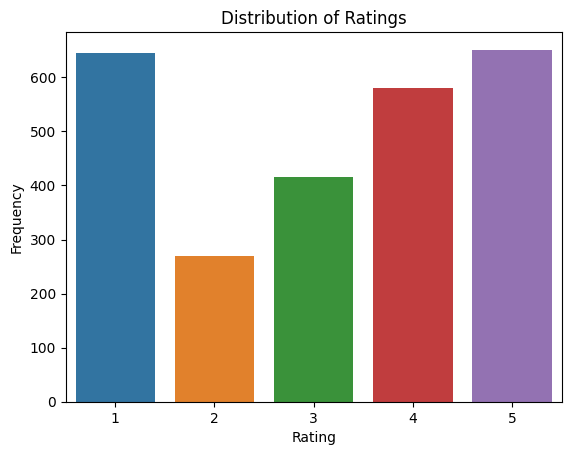

In [19]:
sns.countplot(x='rating', data=df)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


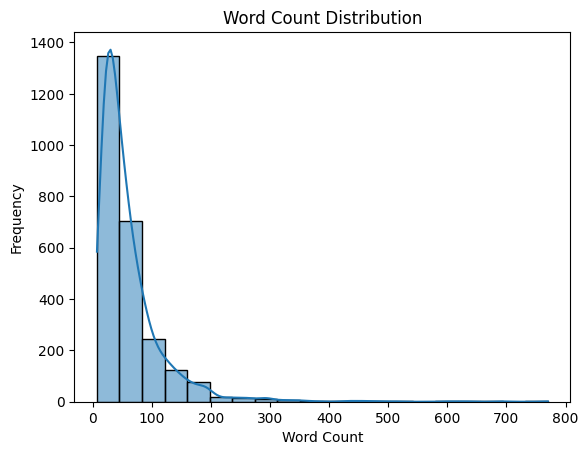

In [21]:
sns.histplot(df['word_count'], kde=True, bins=20)
plt.title('Word Count Distribution')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


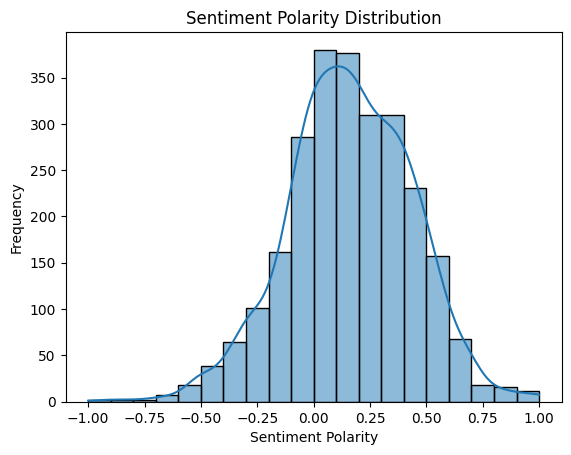

In [31]:
sns.histplot(df['sentiment'], kde=True, bins=20)
plt.title('Sentiment Polarity Distribution')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()

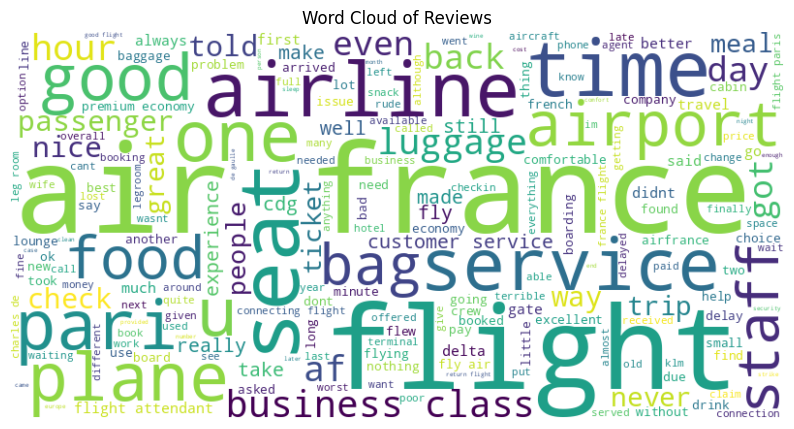

In [39]:
text = ' '.join(df['cleaned_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Reviews')
plt.show()

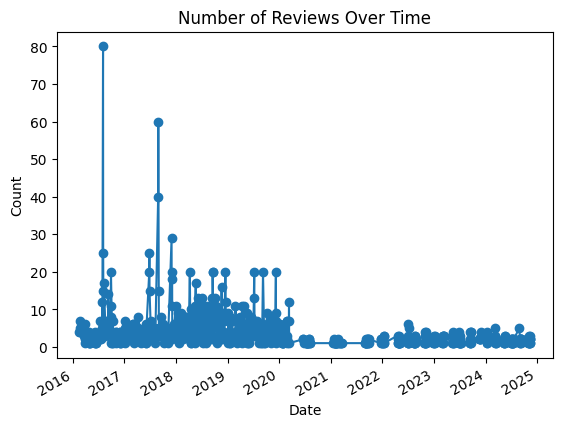

In [35]:
df.groupby('publishedDate').size().plot(kind='line', marker='o')
plt.title('Number of Reviews Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.show()

## Text-Vectorization

In [41]:
# Implementing Bi-grams
vectorizer = CountVectorizer(ngram_range=(2, 2), max_features=5000)
X = vectorizer.fit_transform(df['cleaned_text'])

## Target

In [58]:
y = df['rating']

## Splitting the data

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Training

In [60]:
# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [61]:
# Predict on the test set
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

# Evaluation

**For more accuracy we can use RandSearchCV - Hyperparameter-Tuning**

In [62]:
# Evaluation metrics
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.45      0.82      0.58       123
           2       0.00      0.00      0.00        58
           3       0.30      0.16      0.21        79
           4       0.45      0.38      0.41       115
           5       0.57      0.56      0.57       137

    accuracy                           0.46       512
   macro avg       0.35      0.39      0.35       512
weighted avg       0.41      0.46      0.42       512



## Feature Importance

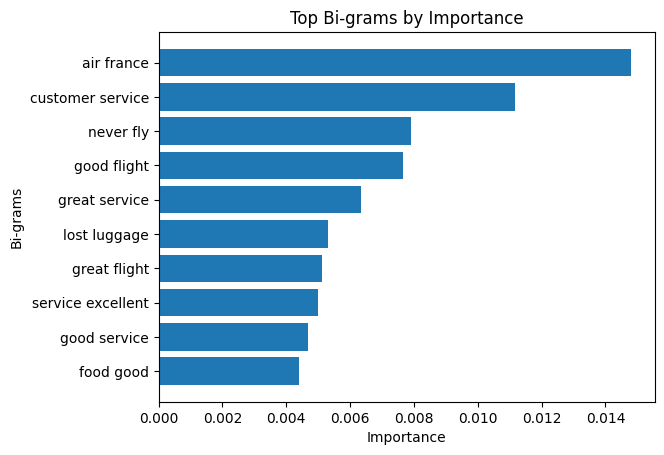

In [66]:
# Feature Importance
feature_importances = rf_model.feature_importances_
top_indices = np.argsort(feature_importances)[-10:]
top_features = [vectorizer.get_feature_names_out()[i] for i in top_indices]

plt.barh(top_features, feature_importances[top_indices])
plt.xlabel("Importance")
plt.ylabel("Bi-grams")
plt.title("Top Bi-grams by Importance")
plt.show()

## Model Interrperability

In [70]:
explainer = LimeTextExplainer(class_names=rf_model.classes_)


def predict_proba_wrapper(texts):
    transformed_texts = vectorizer.transform(texts)
    return rf_model.predict_proba(transformed_texts)

# Explain a specific instance
idx = 0  # Choose an index to explain
text_to_explain = df['cleaned_text'].iloc[idx]

exp = explainer.explain_instance(
    text_to_explain,  # Raw text
    predict_proba_wrapper,  # Use the wrapper function
    num_features=10,  # Number of features to show in explanation
    labels=[0, 1]  # Specify labels for explanation
)

exp.show_in_notebook()
